In [2]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools.dataloader import *
from dlstools import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
%matplotlib inline


In [3]:
p='/dls/i16/data/2018/mt19890-1/%i.nxs'

Load a NeXus file by number into object 'n'

In [5]:
n=pdnx(p % 709993)

The object 'n' is an extended Pandas dataframe and has all Pandas methods...

In [7]:
n

,TimeSec,count_time,delta_axis_offset,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,sum,sz
0,80353.347533,1.0,8.8,113.049822,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,55.0,477.0,35.0,1.0,300.111847,2362446.0,2.92644
1,80357.080736,1.0,8.8,113.063560,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,53.0,445.0,20.0,2.0,300.077789,2361447.0,2.93644
2,80360.307213,1.0,8.8,113.054097,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,52.0,340.0,163.0,3.0,300.051239,2369548.0,2.94644
3,80363.536235,1.0,8.8,113.031811,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,51.0,87.0,67.0,4.0,300.020660,2362702.0,2.95644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,80441.804589,1.0,8.8,112.785138,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,116.0,244.0,96.0,28.0,299.337616,2191894.0,3.19644
28,80445.034924,1.0,8.8,112.766210,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,109.0,244.0,96.0,29.0,299.309662,2192312.0,3.20644
29,80448.265404,1.0,8.8,112.762242,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,90.0,244.0,96.0,30.0,299.281494,2195124.0,3.21644
30,80451.499235,1.0,8.8,112.755830,-133.111303,128.298723,0.0,0.0,145.98665,120.84892,68.0,244.0,96.0,31.0,299.252960,2198268.0,3.22644


... plus extra attributes such as scan command ...

In [8]:
print n.scan

/dls/i16/data/2018/mt19890-1/709993.nxs
scan sz 2.9264400000000004 3.22644 0.01 pil3_100k 1


... and the full NeXus tree

In [9]:
print n.nx.tree

root:NXroot
  entry1:NXentry
    before_scan:NXcollection
      beamline_slits:NXcollection
        s1xcentre = -0.002
        s1xgap = 2.498
        s1ycentre = 0.0015
        s1ygap = 0.999
        s2xcentre = -2.49999999999e-05
        s2xgap = 20.0015
        s2ycentre = 0.00175
        s2ygap = 19.9985
        s3xcentre = 4.4615
        s3xgap = 24.999
        s3ycentre = -0.68825
        s3ygap = 19.9965
        s4xcentre = -5.99775
        s4xgap = 31.9479
        s4ycentre = -0.11625
        s4ygap = 25.2135
        shtr3x = 11.925
        shtr3y = 4.24
      delta_offset:NXcollection
        delta_offset = 0.0
      dettrans:NXcollection
        dettrans = 0.0
      diffractometer_sample:NXcollection
        azih = 1.0
        azik = -1.0
        azil = 0.0
        beta = -21.8778533286
        chi = 89.3049918544
        delta = 128.298722842
        delta_axis_offset = 8.8
        en = 11.2199978624
        eta = 64.8545684058
        gam = 0.0
        h = 4.27772858154
    

We can use standard plotting and analysis (Matplotlib), fit the data...

Function name: Pseudo-Voigt + const
      area:               87 +/- 6         
    centre:           3.1000 +/- 0.0006    
     width:           0.0558 +/- 0.0021    
     lfrac:             0.71 +/- 0.15      
  constant:               33 +/- 16        



/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


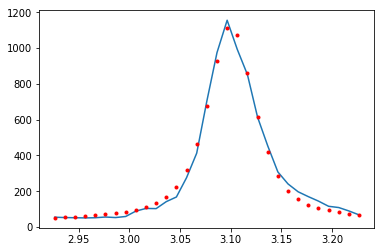

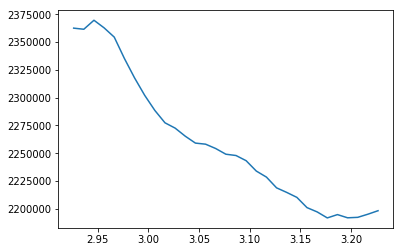

In [10]:
figure()
plot(n.sz, n.maxval)
fit(pv_c)
figure()
plot(n.sz, n['sum'])

Or the Pandas plotting methods

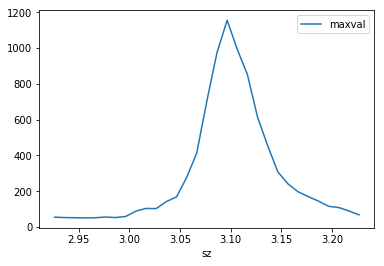

In [11]:
n.plot(x='sz', y='maxval')

The scan data are reproduced in a new NeXus group. Metadata are more delocalized but can be found

In [12]:
find_key(n.nx, 'chi')

.entry1.before_scan.diffractometer_sample.chi


In [13]:
n.nx.entry1.before_scan.diffractometer_sample.chi

NXfield(89.3049918544)

In [14]:
n.nx.plot()

NeXusError: No plotting signal defined

In [22]:
md=n.nx.entry1.before_scan

In [26]:
md.s7xtrans.s7xtrans

NXfield(-0.02159999999999984)

In [24]:
n.nx.entry1.before_scan.s7xtrans

NXcollection('s7xtrans')

In [25]:
find_key(n.nx, 's7xtrans')

.entry1.before_scan.s7xtrans
.entry1.before_scan.s7xtrans.s7xtrans
